In [1]:
import numpy as np
import pandas as pd
from scipy.stats import mstats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pystan
import arviz

In [3]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration','Model Year','Origin']
df = pd.read_csv('auto-mpg.data', names=column_names, na_values = "?", 
                 comment='\t', sep=" ", skipinitialspace=True)

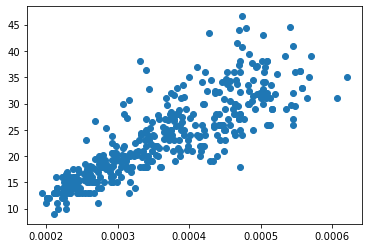

In [4]:
df['Weight_inv'] = df['Weight'].apply(lambda x: 1/x)
plt.scatter(df['Weight_inv'], df['MPG'])

In [5]:
stan_model = """
data {
    int N;
    real X[N];
    real Y[N];
}
parameters {
    real a; 
    real b;
    real<lower=0> sigma;
}
model {
    for (n in 1:N) {
        Y[n] ~ normal(a * X[n] + b, sigma);
    }
}
"""

In [6]:
sm = pystan.StanModel(model_code=stan_model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_baea8ca869534afad1a31f3e70798325 NOW.


In [7]:
stan_data = {
    'N': df.shape[0], 
    'X': df['Weight_inv'], 
    'Y': df['MPG']
}
fit = sm.sampling(data=stan_data, iter=2000, warmup=500, chains=3, seed=123)
print(fit)

Inference for Stan model: anon_model_baea8ca869534afad1a31f3e70798325.
3 chains, each with iter=2000; warmup=500; thin=1; 
post-warmup draws per chain=1500, total post-warmup draws=4500.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a      6.6e4   57.22 2133.9  6.2e4  6.5e4  6.6e4  6.8e4  7.0e4   1391    1.0
b      -0.54    0.02    0.8  -2.17  -1.08  -0.55  -0.01   1.01   1400    1.0
sigma   4.25  3.3e-3   0.16   3.96   4.14   4.25   4.35   4.56   2201    1.0
lp__  -772.7    0.03   1.21 -775.9 -773.3 -772.4 -771.8 -771.3   1323    1.0

Samples were drawn using NUTS at Sun Apr 24 15:43:40 2022.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [8]:
fit.extract('a')['a']
# array([66799.22277616, 62788.84373091, 63577.82392938, ...,
#        63620.47069878, 63571.6229788 , 67382.64630103])

array([67641.94216659, 68630.56851568, 67775.19235397, ...,
       67456.21648577, 68794.06569931, 63430.10060155])

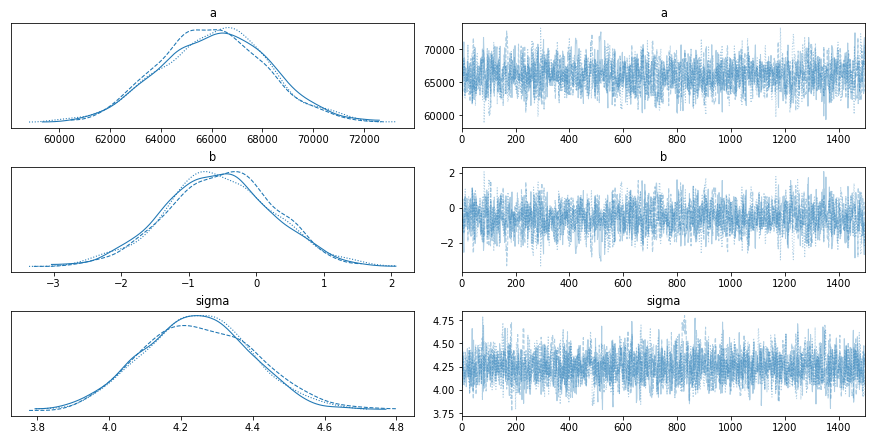

In [9]:
fig = arviz.plot_trace(fit)

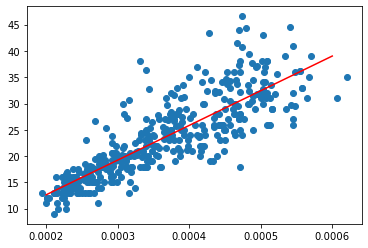

In [10]:
a, b = 6.6e4, -0.57
x = np.linspace(0.0002, 0.0006, 100)
y = a * x + b
plt.plot(x, y, color='red')
plt.scatter(df['Weight_inv'], df['MPG'])